In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path

BASE = Path("D:/COmparative_Study_of_Multimodal_Represenations/data/processed/fashionai")  # adjust if needed

train_df = pd.read_csv(BASE / "train.csv")
val_df   = pd.read_csv(BASE / "val.csv")
test_df  = pd.read_csv(BASE / "test.csv")

# image embeddings
train_img_emb = np.load(BASE / "train_image_emb.npy")
val_img_emb   = np.load(BASE / "val_image_emb.npy")
test_img_emb  = np.load(BASE / "test_image_emb.npy")

In [2]:
print("Train shape:", train_df.shape, " | image_emb:", train_img_emb.shape)
print("Val   shape:", val_df.shape,   " | image_emb:", val_img_emb.shape)
print("Test  shape:", test_df.shape,  " | image_emb:", test_img_emb.shape)

print("\nColumns in train.csv:")
print(train_df.columns.tolist())

Train shape: (31992, 3)  | image_emb: (31992, 512)
Val   shape: (8889, 3)  | image_emb: (8889, 512)
Test  shape: (3555, 3)  | image_emb: (3555, 512)

Columns in train.csv:
['image_path', 'description', 'label']


In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=2, width=100)

idx = 0  # sample index

sample_row = train_df.iloc[idx]
sample_emb = train_img_emb[idx]

print(f"Fashion sample #{idx}\n")

print("Metadata (from train.csv):")
pp.pprint(sample_row.to_dict())

print("\nImage embedding:")
print("Shape:", sample_emb.shape)
print("First 10 dimensions:", np.round(sample_emb[:10], 4))
print("L2 norm:", np.linalg.norm(sample_emb).round(4))


=== Fashion sample #0 ===

Metadata (from train.csv):
{ 'description': 'composition sleeveless pleated empire waist dress made of 100% silk, with a 100% '
                 'cotton lining, ombre dyed in pink and cream, crossover front, v-back, with a '
                 'concealed zipper and metal hook-loop closure on the side fitting regular wash '
                 'care   cold hand wash inside out separately  do not soak, bleach or tumble dry  '
                 'drip dry in shade  cool iron on reverse side  dry cleanable   when your heart '
                 'desires feminine grace, this sleeveless empire dress will fulfill your wish. the '
                 'soft ombre dyed silk fabric in pretty pink and cream will bring out your natural '
                 'beauty, as you sashay around feeling supremely girly. wear jeweled footwear and '
                 'diamond earrings with it to look awesome. model statistics the model wears size '
                 'm in dresses height-5.9", chest-

Image path: D:/COmparative_Study_of_Multimodal_Represenations/data/raw/fashionai/data/8479.jpg
Label: Dresses


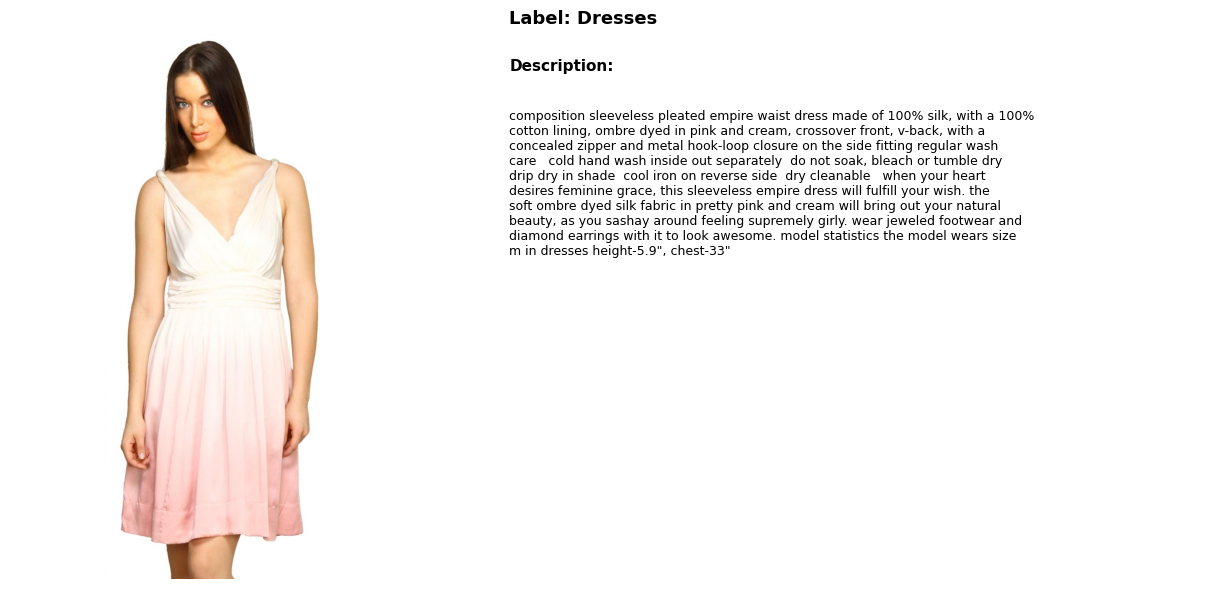

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import textwrap

idx = 0  # sample

row = train_df.iloc[idx]
img_path = row["image_path"]
description = row["description"]
label = row["label"]

print("Image path:", img_path)
print("Label:", label)

# load image
img = Image.open(img_path)

# wrap description text
wrapped_desc = "\n".join(textwrap.wrap(description, width=80))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ax_img, ax_text = axes

ax_img.imshow(img)
ax_img.axis("off")
ax_img.set_title(f"", fontsize=14)

ax_text.axis("off")
y = 1.0
line_h = 0.07

ax_text.text(0.0, y, f"Label: {label}", fontsize=13, weight="bold",
             transform=ax_text.transAxes)
y -= line_h * 1.2

ax_text.text(0.0, y, "Description:", fontsize=11, weight="bold",
             transform=ax_text.transAxes)
y -= line_h

ax_text.text(0.0, y, wrapped_desc, fontsize=9, transform=ax_text.transAxes,
             va="top")

ax_text.set_title("", fontsize=12, loc="left")

plt.tight_layout()
plt.show()
